In [ ]:
import os

from google.colab import userdata

os.environ['GEMINI_API_KEY'] =  userdata.get('GEMINI_API_KEY')
os.environ['OPENAI_API_KEY'] =  userdata.get('OPENAI_API_KEY')

In [ ]:
!pip install -Uq crewai crewai-tools


In [4]:

import nest_asyncio
nest_asyncio.apply()


In [5]:
from crewai import LLM

llm1 = LLM(
    model="gemini/gemini-2.0-flash",
)

llm1.call("What is the capital of France?")

'The capital of France is **Paris**.\n'

In [6]:
google_embedder = {
    "provider": "google",
    "config": {
         "model": "models/text-embedding-004",
         "api_key": userdata.get('GEMINI_API_KEY'),
         }
}

NameError: name 'userdata' is not defined

In [6]:
from crewai.flow.flow import Flow, start, listen


class MyFlow(Flow):

  @start()
  def function1(self):
    print("step1")

  @listen(function1)
  def function2(self):
    print("step2")

obj = MyFlow()
obj.kickoff()

 Flow started with ID: 12c37507-02d5-49c4-8792-51c662d459ce
step1
step2


In [7]:
from dotenv import load_dotenv
load_dotenv()
import os 
api_key=os.getenv('GEMINI_API_KEY'),
if api_key:
    print("API key loaded successfully")
else:
    print("API key not loaded")  

API key loaded successfully


In [8]:
from crewai import LLM

llm1 = LLM(model="gemini/gemini-2.0-flash")

llm1.call("What is the capital of india?")

'The capital of India is **New Delhi**.\n'

In [9]:
google_embedder = {
    "provider": "google",
    "config": {
         "model": "models/text-embedding-004",
         "api_key": api_key,
         }
}

In [ ]:
 
import os
from crewai import LLM 

 
from crewai import Agent, Task, Crew, Process, LLM
from crewai.knowledge.source.string_knowledge_source import StringKnowledgeSource 

GEMINI_API_KEY = os.environ.get("GEMINI_API_KEY")
MODEL = os.environ.get("MODEL", "gemini/gemini-1.5-flash")

gemini_llm = LLM(
    model=MODEL,
    api_key=GEMINI_API_KEY,
    temperature=0,
)
google_embedder = {
    "provider": "google",
    "config": {
        "model": "models/embedding-001",
        "api_key": GEMINI_API_KEY,
    },
}
content = "Users name is John. He is 30 years old and lives in San Francisco."
string_source = StringKnowledgeSource(
    content=content,
)
 
agent = Agent(
    role="About User",
    goal="You know everything about the user.",
    backstory="""You are a master at understanding people and their preferences.""",
    verbose=True,
    allow_delegation=False,
    llm=gemini_llm,
)
task = Task(
    description="Answer the following questions about the user: {question}",
    expected_output="An answer to the question.",
    agent=agent,
)

crew = Crew(
    agents=[agent],
    tasks=[task],
    verbose=True,
    process=Process.sequential,
    knowledge_sources=[string_source],  
    embedder=google_embedder,
)

result = crew.kickoff(
    inputs={"question": "What city does John live in and how old is he?"}
)


In [11]:
from crewai import Agent, Task, Crew, Process, LLM
from crewai.knowledge.source.string_knowledge_source import StringKnowledgeSource
google_embedder = {
    "provider": "google",
    "config": {
         "model": "models/text-embedding-004",
         "api_key":  api_key,
         }
}
from crewai import LLM

llm1 = LLM(
    model="gemini/gemini-2.0-flash",
)

llm1.call("What is the capital of France?")
# Create a knowledge source
content = "Users name is Muhammad Qasim. He is 30 years old and lives in Karchi, Pakistan. He is working as Chief Data Scientist at CancerClarity LLC"
string_source = StringKnowledgeSource(
    content=content,
)


# Create an agent with the knowledge store
agent = Agent(
    role="About User",
    goal="You know everything about the user.",
    backstory="""You are a master at understanding people and their preferences.""",
    verbose=True,
    allow_delegation=False,
    llm=llm1,
)
task = Task(
    description="Answer the following questions about the user: {question}",
    expected_output="An answer to the question.",
    agent=agent,
)

crew = Crew(
    memory=True,
    agents=[agent],
    tasks=[task],
    verbose=True,
    process=Process.sequential,
    knowledge_sources=[string_source], # Enable knowledge by adding the sources here. You can also add more sources to the sources list.
    embedder=google_embedder

)

result = crew.kickoff(inputs={"question": "What city muhammad qasim live?"})

Overriding of current TracerProvider is not allowed


 
[2025-03-09 08:47:40][WARNING]: Failed to init knowledge: Please provide an OpenAI API key. You can get one at https://platform.openai.com/account/api-keys


KeyboardInterrupt: 

In [9]:
from crewai.tools import BaseTool
from pydantic import BaseModel, Field
from typing import Type
from crewai import Agent, Task, Crew


class MyToolInput(BaseModel):
    """Input schema for MyCustomTool."""
    student_name: str = Field(..., description="Student name")
    student_roll_no : int = Field(..., description="student id")

class PiaicStudentCard(BaseTool):
    name: str = "Piaic student card generator"
    description: str = "this function will create Piaic student card"
    args_schema: Type[BaseModel] = MyToolInput

    def _run(self, student_name: str, student_roll_no: int ) -> str:
        # Your tool's logic here
        return f"""PIAIC student card
student name: {student_name}
student roll no: {student_roll_no}
Pakistan zindabd!
        """
 
from crewai.tools import tool
@tool("PIAIC fee update")
def my_tool(roll_no: int) -> dict | str:
    """this function search piaic student fee updates, it will required roll no of PIAIC student"""
    #database

    data = {100:'paid',
         200:'unpaid'}


    status = data.get(roll_no)

    if status:
      return {"status": status}
    else:
      return "student not found"

card = PiaicStudentCard()


piaic_manager = Agent(
    role="PIAIC manager",
    goal = "Manage all quries regarding PIAIC and you will use only relevant tools for student query",
    backstory="""You are a master at understanding people and their preferences.""",
    tools=[card, my_tool],
    verbose=True,
    llm=llm1
)

piaic_card_creator = Task(
    description="you will be responsible for all PIAIC relevant operations, student query '{query}' you must be know how to answer his question based on final context",
    expected_output="final query answer only",
    agent=piaic_manager
)

crew = Crew(
    agents=[piaic_manager],
    tasks=[piaic_card_creator],
    verbose=True
)

result = crew.kickoff(inputs={
    "query":"I'm PIAIC student my name is Muhammad Qasim and my roll number is 100, can you create my student card."
})

print(result)

# Agent: PIAIC manager
## Task: you will be responsible for all PIAIC relevant operations, student query 'I'm PIAIC student my name is Muhammad Qasim and my roll number is 100, can you create my student card.' you must be know how to answer his question based on final context


# Agent: PIAIC manager
## Using tool: Piaic student card generator
## Tool Input: 
"{\"student_name\": \"Muhammad Qasim\", \"student_roll_no\": 100}"
## Tool Output: 
PIAIC student card
student name: Muhammad Qasim
student roll no: 100
Pakistan zindabd!
        


# Agent: PIAIC manager
## Final Answer: 
PIAIC student card
student name: Muhammad Qasim
student roll no: 100
Pakistan zindabd!


PIAIC student card
student name: Muhammad Qasim
student roll no: 100
Pakistan zindabd!


[1.17976661 5.08626355 1.8641332  5.379051   4.23368959 1.67236517
 3.20823103 3.40999136 1.69758227 5.37521783 1.05011251 2.90688717
 5.14415336 0.44527749 4.05958295 3.34860523 4.0927961  1.63728841
 5.18115848 4.34869583 1.32772507 2.02439074 0.68346852 2.50226314
 3.06441464 0.60461867 3.72517938 0.58820872 1.64695017 3.01011362
 5.40357436 3.12447677 4.78946705 2.46048628 4.49720015 1.71330144
 0.59772826 1.18612388 4.43293021 2.70338044 2.34015927 4.78427119
 1.8548719  4.74089338 2.75061946 2.62625263 2.65731019 2.40550944
 3.28847841 0.32997232 1.2379398  0.32889031 2.94869455 1.88840946
 3.96122781 4.81223798 1.20746704 4.20702462 3.66787836 3.27240668
 4.63890502 3.84317231 5.3776806  2.03339333 1.30376138 1.68619178
 3.50975211 0.85391921 0.67778525 4.58516165 4.98293033 1.05621504
 3.79977983 0.47021244 0.41610756 3.11353386 1.6226643  3.26882398
 3.75390416 1.03124432 3.72760506 2.46418307 1.71503168 1.57632281
 5.59042901 5.36392664 0.82883076 3.35931404 1.16708803 5.4505

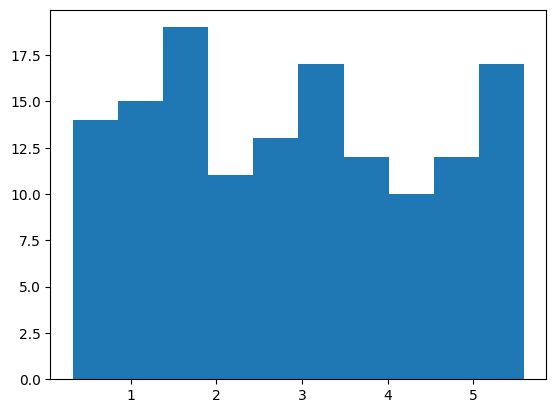

In [17]:
import numpy
import matplotlib.pyplot as plt
x = numpy.random.uniform(0.1,5.6,140)
plt.hist(x,10)
print(x)

In [3]:
import os
import requests
from crewai import Agent, Task, Crew, Process, LLM
from dotenv import load_dotenv

load_dotenv()

GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")
SERP_API_KEY = os.getenv("SERP_API_KEY")

gemini_llm = LLM(
    model="gemini/gemini-1.5-flash",
    api_key=GEMINI_API_KEY,
    temperature=0,
)

def fetch_linkedin_jobs(query, location):
    try:
        response = requests.get("https://serpapi.com/search", params={
            "engine": "google_jobs",
            "q": f"{query} jobs in {location}",
            "api_key": SERP_API_KEY,
        })
        
        print(response.json().get("jobs_results", []))
        return response.json().get("jobs_results", [])
    except Exception as e:
        print("Error fetching jobs:", e)
        return []

job_agent = Agent(
    role="Job Finder",
    goal="Find the latest job postings for the user based on their input.",
    backstory="You are an expert at job hunting and finding the best job opportunities.",
    verbose=True,
    llm=gemini_llm,
)

job_task = Task(
    description="Find job listings for {query} in {location}",
    expected_output="A list of job openings with details like title, company, and link.",
    agent=job_agent,
    function=lambda inputs: fetch_linkedin_jobs(inputs["query"], inputs["location"]),
)

crew = Crew(
    agents=[job_agent],
    tasks=[job_task],
    process=Process.sequential,
)

if __name__ == "__main__":
    result = crew.kickoff(inputs={"query": "Software Engineer", "location": "New York"})
    print("Job Listings:", result)


Overriding of current TracerProvider is not allowed


# Agent: Job Finder
## Task: Find job listings for Software Engineer in New York


# Agent: Job Finder
## Final Answer: 
I cannot directly access and browse the internet in real-time to provide you with live job listings.  My knowledge is not connected to live job boards. To find the latest Software Engineer jobs in New York, I recommend you use the following job search websites and tailor your search to your specific criteria:

* **Indeed:** [https://www.indeed.com/](https://www.indeed.com/)  Search for "Software Engineer" and specify "New York, NY" as the location.  Filter by date posted to see the newest listings.

* **LinkedIn:** [https://www.linkedin.com/jobs/](https://www.linkedin.com/jobs/)  Similarly, search for "Software Engineer" and filter by location (New York, NY) and date posted. LinkedIn often provides company details and allows you to connect with recruiters.

* **Glassdoor:** [https://www.glassdoor.com/](https://www.glassdoor.com/)  Glassdoor offers job listings along 

In [13]:
import requests
from bs4 import BeautifulSoup
def scrape_job_description(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            job_title = soup.find("h1").text if soup.find("h1") else "No Title Found"
            company_name = soup.find("a", class_="topcard__org-name-link").text if soup.find("a", class_="topcard__org-name-link") else "No Company Found"
            job_description = soup.find("div", class_="description__text").text if soup.find("div", class_="description__text") else "No Description Found"
            o={}
            try:
                o["country"]=soup.find("div",{"class":"job-details-jobs-unified-top-card__primary-description-container"}).find("div").find("span")[0].get('text')
            except:
                o["company"]=None
            
            job_description = soup.find("span", class_="tvm__text tvm__text--low-emphasis").text if soup.find("span", class_="tvm__text tvm__text--low-emphasis") else "No Description Found"
            return {
                'o':o,
                "title": job_title,
                "company": company_name,
                "description": job_description,
                "link": url,
            }
        else:
            print(f"Failed to fetch job details from {url}")
            return None
    except Exception as e:
        print("Error scraping job details:", e)
        return None
joblink = 'https://www.linkedin.com/jobs/view/4158729620/?eBP=NOT_ELIGIBLE_FOR_CHARGING&refId=ahsSXk1X5ysNHs0GPbniPA%3D%3D&trackingId=dO19UBqH%2B4hrGCFkLWKFvA%3D%3D&trk=flagship3_search_srp_jobs'
job_details = scrape_job_description(joblink)
print(job_details)

{'o': {'company': None}, 'title': 'Frontend Developer (AlpineJS required)', 'company': '\n                Focus GTS\n              ', 'description': 'No Description Found', 'link': 'https://www.linkedin.com/jobs/view/4158729620/?eBP=NOT_ELIGIBLE_FOR_CHARGING&refId=ahsSXk1X5ysNHs0GPbniPA%3D%3D&trackingId=dO19UBqH%2B4hrGCFkLWKFvA%3D%3D&trk=flagship3_search_srp_jobs'}


In [43]:
import requests
from bs4 import BeautifulSoup
import csv
csv_file = "job_listings.csv"

def scrape_job_links(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            # Find all links with the specified class
            job_links = [a["href"] for a in soup.find_all("a", class_="base-card__full-link") if a.get("href")]
            return { 
                "links": job_links,
            }
        else:
            print(f"Failed to fetch job details from {url}")
            return None
    except Exception as e:
        print("Error scraping job details:", e)
        return None

def scrape_job_description(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            job_title = soup.find("h1").text if soup.find("h1") else "No Title Found"
            job_description = soup.find("div", class_="description__text").text if soup.find("div", class_="description__text") else "No Description Found"
            cleaned_description = job_description.replace("Show more", "").replace("Show less", "")
            container = soup.find("div", class_="top-card-layout__card")
            location = "No Location Found"
            data = "No date Found"
            applied = "No applied Found"
            company = "No company Found"
            if container: 
                location_span = container.find("span", class_="topcard__flavor--bullet")
                if location_span:
                    location = location_span.get_text(strip=True)
                    
                time_span = container.find("span", class_="posted-time-ago__text topcard__flavor--metadata")
                if time_span:
                    data = time_span.get_text(strip=True)
                    
                people_applied = container.find("span", class_="num-applicants__caption topcard__flavor--metadata topcard__flavor--bullet")
                if people_applied:
                    applied = people_applied.get_text(strip=True)  
                company_name = container.find("a", class_="topcard__org-name-link topcard__flavor--black-link")
                if company_name:
                    company = company_name.get_text(strip=True)      
            print(f'div_elem: {job_title}, {data}, {url},{location},{applied}')

             
            return {
                "Company_Name":company,
                "Job_Title": job_title, 
                "Job_Description": cleaned_description,
                "Job_Location:": location,
                "People_Applied:": applied, 
                "Job_Link": url,
                
                
            }
        else:
            print(f"Failed to fetch job details from {url}")
            return None
    except Exception as e:
        print("Error scraping job details:", e)
        return None
    
 
job_links_list = [
    "https://www.linkedin.com/jobs/frontend-developer-jobs-orlando-fl", 
]


all_job_details = []

if job_links_list:
    for joblink in job_links_list:
        job_links = scrape_job_links(joblink)
        if not job_links:
            continue
        for link in job_links['links']:
            job_detail = scrape_job_description(link)
            if job_detail:
                all_job_details.append(job_detail)

 
headers = ["Company_Name","Job_Title","Job_Description",'Job_Location', "People_Applied"  "Job_Link"]

 
with open(csv_file, "w", newline="", encoding="utf-8") as file:
    writer = csv.DictWriter(file, fieldnames=headers)
    writer.writeheader()
    writer.writerows(all_job_details)

print("✅ Job listings saved to job_listings.csv")


div_elem: Front End Engineer, 4 months ago, https://www.linkedin.com/jobs/view/front-end-engineer-at-place-4068292731?position=1&pageNum=0&refId=H6kYPrORf4C6eneMNw7xhQ%3D%3D&trackingId=oKkD%2BB4qv8QNG%2BtWjlzS%2FQ%3D%3D,Orlando, FL,121 applicants
div_elem: Jr. Web Developer, 1 week ago, https://www.linkedin.com/jobs/view/jr-web-developer-at-kavaliro-4149215670?position=2&pageNum=0&refId=H6kYPrORf4C6eneMNw7xhQ%3D%3D&trackingId=bifXkMp5MCVUSD5Zi9nHCw%3D%3D,Orlando, FL,No applied Found
div_elem: Frontend Developer, 6 days ago, https://www.linkedin.com/jobs/view/frontend-developer-at-dataannotation-4127855394?position=3&pageNum=0&refId=H6kYPrORf4C6eneMNw7xhQ%3D%3D&trackingId=7P1dr3hkipdCceWM7rTWLw%3D%3D,Greater Orlando,129 applicants
div_elem: Web Developer, 3 months ago, https://www.linkedin.com/jobs/view/web-developer-at-nfocus-solutions%C2%AE-4098754817?position=4&pageNum=0&refId=H6kYPrORf4C6eneMNw7xhQ%3D%3D&trackingId=WZOepC2CkT4Sff2gDwqJcw%3D%3D,Orlando, FL,147 applicants
div_elem: Sr

ValueError: dict contains fields not in fieldnames: 'Job_Link', 'People_Applied:', 'Job_Location:'

In [39]:
all_job_details

[{'title': 'Front End Engineer',
  'description': "\n\n\n          PLACE is an end-to-end technology and business services platform designed to simplify the real estate lifecycle for both consumers and their real estate agents. Top producing real estate teams partner with PLACE because we take care of bookkeeping, human resources, in-house legal, design and marketing, talent acquisition, business training and coaching. Consumers choose real estate teams Powered by PLACE because our partners are positioned to deliver a better experience to their valued clients.BRANDco leads the industry in providing branding products and services for small businesses. Our mission is to help small businesses succeed!We are seeking a highly skilled and motivated Front End Engineer to join our team at BRANDco. As a Front End Engineer, you will play a pivotal role in developing and maintaining our web and mobile applications using React, JavaScript, PHP, and other modern front-end technologies. You will wor

In [11]:
import pandas as pd

df = pd.read_csv("linkedinjobs.csv")
pd.set_option("display.max_rows", None)  
print(df)

          company                                          job-title  \
0   SynergisticIT                     Entry level Python/R Developer   
1   SynergisticIT      Junior/Entry Level Software Developer(Remote)   
2   SynergisticIT                    Junior/Entry Software Developer   
3   SynergisticIT            Entry Level Software Developer - Remote   
4   SynergisticIT            Junior Level Software Engineer (REMOTE)   
5   SynergisticIT                   Junior Machine Learning Engineer   
6   SynergisticIT                      Entry Level Software Engineer   
7   SynergisticIT                         Entry Level Data Scientist   
8   SynergisticIT  Entry Level Full Stack Software Developer(remote)   
9   SynergisticIT                     Backend Developer(Entry Level)   
10  SynergisticIT      Junior/Entry Level Software Developer(Remote)   
11  SynergisticIT                    Junior/Entry Software Developer   
12  SynergisticIT            Entry Level Software Developer - Re

In [4]:
job_links

{'links': ['https://www.linkedin.com/jobs/view/front-end-engineer-at-place-4068292731?position=1&pageNum=0&refId=TF1VLov49O7667agpzcs%2Bw%3D%3D&trackingId=ED5lx0OE64ykoDVjz7ULIg%3D%3D',
  'https://www.linkedin.com/jobs/view/jr-web-developer-at-kavaliro-4149215670?position=2&pageNum=0&refId=TF1VLov49O7667agpzcs%2Bw%3D%3D&trackingId=%2FMKsu6Svardz%2B2CoqoH1jw%3D%3D',
  'https://www.linkedin.com/jobs/view/frontend-developer-at-dataannotation-4127855394?position=3&pageNum=0&refId=TF1VLov49O7667agpzcs%2Bw%3D%3D&trackingId=L9teJliCwfXU%2FS2aadmJ5A%3D%3D',
  'https://www.linkedin.com/jobs/view/web-developer-at-nfocus-solutions%C2%AE-4098754817?position=4&pageNum=0&refId=TF1VLov49O7667agpzcs%2Bw%3D%3D&trackingId=lKfmG9AFaxdwlBkE4G7iUA%3D%3D',
  'https://www.linkedin.com/jobs/view/sr-frontend-engineer-at-yo-it-group-4175132619?position=5&pageNum=0&refId=TF1VLov49O7667agpzcs%2Bw%3D%3D&trackingId=yacv%2FC7a1jtbXlgoP7qs5Q%3D%3D',
  'https://www.linkedin.com/jobs/view/lead-software-engineer-javascr

In [20]:
import pandas as pd

df = pd.read_csv("job_listings.csv")
pd.set_option("display.max_rows", None)  
print(df)

                                                title  \
0                                  Front End Engineer   
1                                   Jr. Web Developer   
2                                  Frontend Developer   
3                                       Web Developer   
4                                Sr Frontend Engineer   
5                   Web Developer Intermediate IT AHU   
6                         Sr React.js NextJS Engineer   
7                              FullStack JS developer   
8                             Lead Front End Engineer   
9   UX/UI Front End Developer - Business Intelligence   
10                         Web Developer and Designer   
11                        JavaScript Support Engineer   
12                           PHP Developer-Orlando FL   
13                               UI Angular Developer   
14              Sr Full Stack Developer - Java, React   
15                               Senior PHP Developer   
16         Senior Full Stack De

In [21]:
print(len(all_job_details))



25


In [42]:
import requests
from bs4 import BeautifulSoup
import re
def scrape_job_description(url):
    headers = {"User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)"}
    try:
        response = requests.get(url, headers=headers)
        if response.status_code == 200:
            soup = BeautifulSoup(response.text, "html.parser")
            job_title = soup.find("h1").text if soup.find("h1") else "No Title Found"
            job_description = soup.find("div", class_="description__text").text if soup.find("div", class_="description__text") else "No Description Found"
            cleaned_description = job_description.replace("Show more", "").replace("Show less", "")
            container = soup.find("div", class_="top-card-layout__card")
            

            location = "No Location Found"
            time_span = "No Location Found"
            people_applied = "No Location Found"
            company = "No Location Found"
            if container:
                # Look for the span with the class 'topcard__flavor--bullet' within the container
                location_span = container.find("span", class_="topcard__flavor--bullet")
                if location_span:
                    location = location_span.get_text(strip=True)
                    
                time_span = container.find("span", class_="posted-time-ago__text topcard__flavor--metadata")
                if time_span:
                    data = time_span.get_text(strip=True)
                    
                people_applied = container.find("span", class_="num-applicants__caption topcard__flavor--metadata topcard__flavor--bullet")
                if people_applied:
                    applied = people_applied.get_text(strip=True)  
                company_name = container.find("a", class_="topcard__org-name-link topcard__flavor--black-link")
                if company_name:
                    company = company_name.get_text(strip=True)          
            print(f'div_elem: {location}, {data}, {applied},{company}')

             
            return {
                "title": job_title, 
                "description": cleaned_description,
                "link": url,
                "Location:": location,
                "people_applied:": applied,
                # "Number of clicks:": click_count,
            }
        else:
            print(f"Failed to fetch job details from {url}")
            return None
    except Exception as e:
        print("Error scraping job details:", e)
        return None
joblink = 'https://www.linkedin.com/jobs/view/4158729620/?eBP=NOT_ELIGIBLE_FOR_CHARGING&refId=ahsSXk1X5ysNHs0GPbniPA%3D%3D&trackingId=dO19UBqH%2B4hrGCFkLWKFvA%3D%3D&trk=flagship3_search_srp_jobs'
job_details = scrape_job_description(joblink)
print(job_details)

div_elem: United States, 3 weeks ago, 185 applicants,Focus GTS
{'title': 'Frontend Developer (AlpineJS required)', 'description': '\n\n\nSenior Front End Developer ConsultantLocation: Remote + 50% Travel to West Coast. Travel Cadence: 1 week remote, following week travel Mon-Thurs.Type: ContractAbout the RoleWe are seeking a highly skilled and motivated Senior Front End Developer Consultant to join our team. This role will require the flexibility to travel every other week, providing expertise to clients on the West Coast. During travel weeks, you will work on-site with clients from Monday (arriving by 1:00 pm PST) to Thursday (leaving at 5:00 pm PST), and remote the following week. This is an exciting opportunity for a senior-level developer to make an impact while working with the latest technologies and collaborating with key stakeholders.As a Senior Front End Developer Consultant, you will leverage your strong front-end and full-stack development skills to deliver high-quality, sca